# AuxTel Pointing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

from astropy.table import Table, join

In [2]:
%matplotlib inline


In [3]:
from datetime import date
date = date.today().strftime("%d%m%Y")
print(f'Today is: {date}')

Today is: 04052022


## The Dataset

Basically, we query the WCS solution from the bulter calibrate task, the boresight pointing position and some information from the exposure metadata. The sample was queried using the script `query_pointing_bluter_reviewed.py`.

The main quantities of this dataset are:
- `RA`, `DEC` : pointing sky position from the boersight
- `RA_WCS`, `DEC_WCS` : pointing sky position from the wcs solutions
- `PNT_OFFSET`: angular distance between the two pointings.

The other columns are exclusively from the metadata and the end with `_MD`: `RA`, `DEC`,`MJD`,`EXPTIME`,`TEMP_SET`,`CCDTEMP`,`FILTER`,`ELSTART`,`ELEND`,`AZSTART`,`AZEND`

The file `data/rev_checking_auxtel_pointing_{date}.csv` contains info about 1421 exposures taken from Feb 2020 up to Nov 2021. The collection used to generate this file was `u/mfl/testProcessCcd_srcMatchFull_181e6356`. And it's from the `lsst.rapid.analysis.butlerUtils`.

<br>
 <font size="4"> <b> Caveat: </b> Not all the images from the observation nights. The calibration filters exposures selecting preferentially crowded fields.</font> 

# The Telescope Pointing

In [7]:
month = 'Apr2022'
title = 'Feb 2020 - April 2022'

In [8]:
import pandas as pd

df0 = pd.read_csv('data/rev_checking_auxtel_pointing_24032022.csv',index_col=0)
df1 = pd.read_csv('data/rev_checking_auxtel_pointing_Feb2022.csv',index_col=0)
df2 = pd.read_csv('data/rev_checking_auxtel_pointing_Mar2022.csv',index_col=0)
df3 = pd.read_csv('data/2022_Apr.csv',index_col=0)

df = pd.concat([df0,df1,df2,df3])
df.DATE = pd.to_datetime(df.DATE)#.dt.date

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df[cols].copy()

In [9]:
# df = df.sort_values(by='MJD')

In [10]:
import numpy as np

deg = np.pi/180.
def separation(ra1,dec1,ra2,dec2):
    return np.sqrt( np.cos(dec1*deg)*(ra1-ra2)**2 + (dec1-dec2)**2 )*3600.

def getAngDist(ra1, dec1, ra2, dec2):
    # output in arcmin
    delt_lon = (ra1 - ra2)*np.pi/180.
    delt_lat = (dec1 - dec2)*np.pi/180.
    # Haversine formula
    dist = 2.0*np.arcsin( np.sqrt( np.sin(delt_lat/2.0)**2 + \
         np.cos(dec1*np.pi/180.)*np.cos(dec2*np.pi/180.)*np.sin(delt_lon/2.0)**2 ) )  
    return (dist/np.pi*180.)*60

In [11]:
# df['AZMEAN'] = 0.5*(df['AZEND']+df['AZSTART'])
# df['ELMEAN'] = 0.5*(df['ELEND']+df['ELSTART'])

# df['dRA'] = (df['RA_WCS']-df['RA'])*60
# df['dDEC']= (df['DEC_WCS']-df['DEC'])*60

# df['PNT_OFFSET_MD'] = getAngDist(df['RA_WCS'], df['DEC_WCS'], df['RA_MD'], df['DEC_MD'])

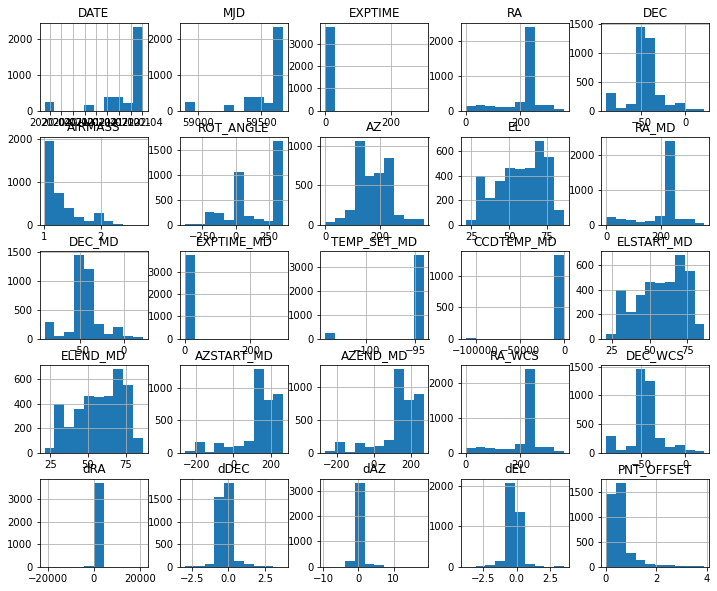

In [12]:
_ = df.hist(figsize=(12,10))

In [13]:
# outliers = np.abs(df['PNT_OFFSET'])>60
outliers = np.abs(df['dRA'])>2*3600
df[outliers]

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,ELEND_MD,AZSTART_MD,AZEND_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET
2021110400400,2021-11-05 03:31:58.846693,59523.147209,30.0,0.025367,-89.896757,1.964636,359.990442,180.048559,30.507803,0.0,...,30.507567,180.048559,180.049145,359.663974,-89.895340,-21578.316413,-0.085006,-0.085154,-0.058176,0.093668
2022031600265,2022-03-17 01:11:35.933958,59655.049721,30.0,359.996004,-89.896727,1.983017,37.172384,180.156066,30.193154,0.0,...,30.192707,180.156066,180.155758,5.520111,-89.891691,21268.553610,-0.302179,-0.646712,-0.390415,0.682154


In [14]:
df[['RA','RA_WCS','dRA','PNT_OFFSET']][outliers]

,RA,RA_WCS,dRA,PNT_OFFSET
2021110400400,0.025367,359.663974,-21578.316413,0.093668
2022031600265,359.996004,5.520111,21268.553610,0.682154


Note: suggest to DM to add a mod into their offset function (dRa, dDec, ...).

In [15]:
21578.316413/60. # deg

359.63860688333335

In [16]:
(360-21578.316413/60.) # this should be dRA (deg)

0.36139311666664753

## Plots

In [17]:
df['month_year'] = df['DATE'].apply(lambda x: x.strftime('%Y %b')) # e.g. Jul 2021
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year + df.month/12

df1 = df[~outliers]


In [18]:
# df1 = df[cols][~outliers]
# # df1['DATE'] = df1['DATE'].dt.date

In [19]:
df

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET,month_year,month,year
2020021700328,2020-02-18 04:08:26.981500,58897.172535,5.0,144.696586,-60.091873,1.156347,37.450522,173.810313,59.859032,144.696586,...,144.702793,-60.083396,-0.372380,-0.508598,0.543643,-0.467315,0.541438,2020 Feb,2,2020.166667
2020021900181,2020-02-20 01:17:20.558502,58899.053710,5.0,307.078084,-87.472205,2.123569,255.687811,181.448881,28.093086,307.078084,...,306.948404,-87.469098,7.780807,-0.186407,0.241135,0.327598,0.390710,2020 Feb,2,2020.166667
2020021900183,2020-02-20 01:17:47.273001,58899.054019,5.0,307.078084,-87.472205,2.123743,255.698335,181.443863,28.090576,307.078084,...,306.948123,-87.468959,7.797656,-0.194761,0.238091,0.334899,0.395419,2020 Feb,2,2020.166667
2020021900184,2020-02-20 01:19:18.420998,58899.055074,2.0,307.078084,-87.472205,2.124695,255.744666,181.429553,28.076867,307.078084,...,306.945464,-87.463069,7.957195,-0.548176,0.060078,0.649045,0.651232,2020 Feb,2,2020.166667
2020021900185,2020-02-20 01:20:54.170500,58899.056183,2.0,307.078084,-87.472205,2.124996,255.751588,181.422354,28.072545,307.078084,...,307.178286,-87.462851,-6.012094,-0.561228,-0.561953,0.373197,0.620923,2020 Feb,2,2020.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022040700902,2022-04-08 09:56:51.428030,59677.414484,30.0,221.874558,-44.779302,1.372965,5.229767,235.037920,46.702554,221.874311,...,221.869221,-44.780324,0.320227,0.061340,0.084472,0.228118,0.235434,2022 Apr,4,2022.333333
2022040700903,2022-04-08 09:57:32.139560,59677.414955,30.0,221.874458,-44.779298,1.375691,5.427059,235.040992,46.584097,221.874311,...,221.868877,-44.780319,0.334864,0.061315,0.084777,0.238382,0.245474,2022 Apr,4,2022.333333
2022040700904,2022-04-08 09:58:04.731532,59677.415333,30.0,221.874531,-44.779295,1.377881,5.426391,235.043246,46.486481,221.874311,...,221.868854,-44.780360,0.340584,0.063880,0.088863,0.242368,0.250050,2022 Apr,4,2022.333333
2022040700905,2022-04-08 09:58:46.174464,59677.415812,30.0,221.874578,-44.779298,1.380678,5.961297,235.045693,46.365155,221.874311,...,221.869068,-44.780326,0.330611,0.061712,0.086372,0.235139,0.242653,2022 Apr,4,2022.333333


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set_context('talk', font_scale=0.9)

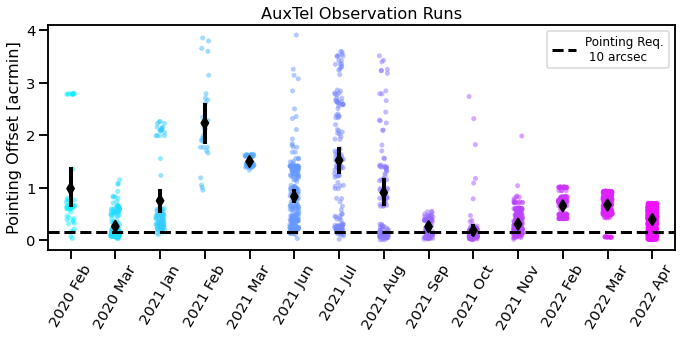

In [22]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
sns.stripplot(x=df.month_year, y='PNT_OFFSET', palette="cool", data=df, dodge=True, alpha=.5, zorder=1)
# ax = sns.pointplot(x=df.month_year, y='PNT_OFFSET', data=df, markers="d", palette="magma", scale=.75, ci=99)

# sns.stripplot(x=df.month_year, y='PNT_OFFSET', color="black", data=df, dodge=True, alpha=.25, zorder=1)
ax = sns.pointplot(x=df.month_year, y='PNT_OFFSET', data=df, markers="d", color="black", scale=.75, ci=99, join=False)

ax.axhline(10/60,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
# ax.set_title('Joliette')
ax.set_ylabel('Pointing Offset [acrmin]')
ax.set_xlabel('')
ax.set_title('AuxTel Observation Runs')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
fig.tight_layout()
fig.savefig(f'figures/pointing_offset_monthly_{month}.png',facecolor='w',transparent=False,dpi=100)

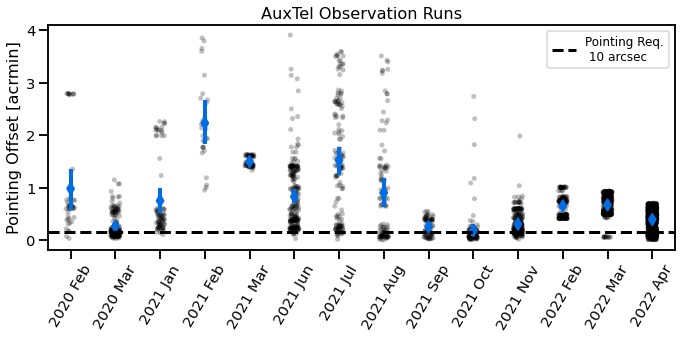

In [23]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
# sns.stripplot(x=df.month_year, y='PNT_OFFSET', palette="cool", data=df, dodge=True, alpha=.5, zorder=1)
# ax = sns.pointplot(x=df.month_year, y='PNT_OFFSET', data=df, markers="d", palette="magma", scale=.75, ci=99)

sns.stripplot(x=df.month_year, y='PNT_OFFSET', color="black", data=df, dodge=True, alpha=.25, zorder=1)
ax = sns.pointplot(x=df.month_year, y='PNT_OFFSET', data=df, markers="d", color="#016CE4", scale=.75, ci=99, join=False)

ax.axhline(10/60,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
# ax.set_title('Joliette')
ax.set_ylabel('Pointing Offset [acrmin]')
ax.set_xlabel('')
ax.set_title('AuxTel Observation Runs')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
fig.tight_layout()
fig.savefig(f'figures/pointing_offset_timeline_{month}.png',facecolor='w',transparent=False,dpi=100)

In [29]:
p1,pm,p2 = np.percentile(df3.PNT_OFFSET, [16,50,84])
s68 = (p2-p1)/2.
s68*60

14.446590159763286

In [26]:
mybins = np.arange(0.,2.3,7/60.)
end_2021 = (df1['year']>=2022)&(df1['month']>3)
sep_up = end_2021 | (df1['year']>=2022)

In [27]:
df1['month_year'][sep_up]

2022021500334    2022 Feb
2022021500335    2022 Feb
2022021500338    2022 Feb
2022021500339    2022 Feb
2022021500344    2022 Feb
                   ...   
2022040700902    2022 Apr
2022040700903    2022 Apr
2022040700904    2022 Apr
2022040700905    2022 Apr
2022040700906    2022 Apr
Name: month_year, Length: 2313, dtype: object

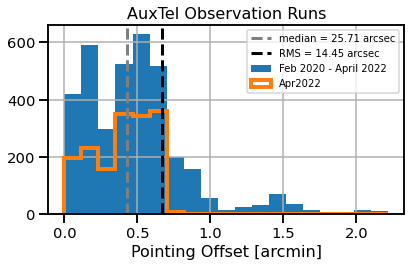

In [32]:
df['PNT_OFFSET'].hist(bins=mybins,label=title,density=False,lw=4)
df3['PNT_OFFSET'].hist(bins=mybins,label=month,density=False, histtype='step',lw=4)

plt.axvline(pm,color='gray',ls='--',lw=3, label=r'median = %.2f arcsec'%(pm*60))
plt.axvline(pm+s68,color='k',ls='--',lw=3, label=r'RMS = %.2f arcsec'%((s68)*60))

plt.xlabel('Pointing Offset [arcmin]',fontsize=16)

plt.legend(fontsize=10)
plt.title(f'AuxTel Observation Runs',fontsize=16)
plt.tight_layout()
plt.savefig(f'figures/rev_pointing_offset_distribution_{month}.png',facecolor='w',transparent=False,dpi=100)

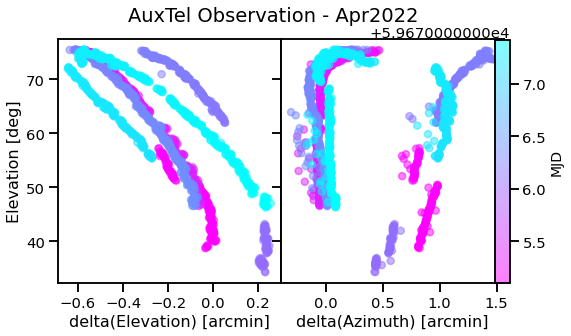

In [33]:
# fig = plt.figure(figsize=(10,4))
# plt.subplot(1, 2, 1)

fig, axs = plt.subplots(1,2, figsize=(8, 4.5), sharey='all')
plt.subplots_adjust(wspace=0.)
im =axs[0].scatter(df3.dEL[sep_up], df3.EL[sep_up], alpha=0.5, s=50, c=df3.MJD[sep_up], cmap='cool_r')
# plt.scatter(df1.dEL[outliers2], df1.EL[outliers2], s=50, alpha=0.6)
axs[0].set_ylabel('Elevation [deg]',fontsize=16)
axs[0].set_xlabel('delta(Elevation) [arcmin]',fontsize=16)


axs[1].scatter(df3.dAZ[sep_up], df3.EL[sep_up], alpha=0.5, s=50,label=f'{len(df3)} Fields', c=df3.MJD[sep_up], cmap='cool_r')
axs[1].set_xlabel('delta(Azimuth) [arcmin]',fontsize=16)

plt.draw()
p0 = axs[0].get_position().get_points().flatten()
p1 = axs[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p1[2]-0.015, 0.125, 0.025, p1[2]-p0[0]-0.025])
fig.colorbar(im, cax=ax_cbar).set_label('MJD',fontsize=14)
fig.subplots_adjust(wspace=0.)
fig.suptitle(f'AuxTel Observation - {month}')
fig.savefig(f'figures/elevation_offsets_{month}.png',facecolor='w',transparent=False,dpi=100)

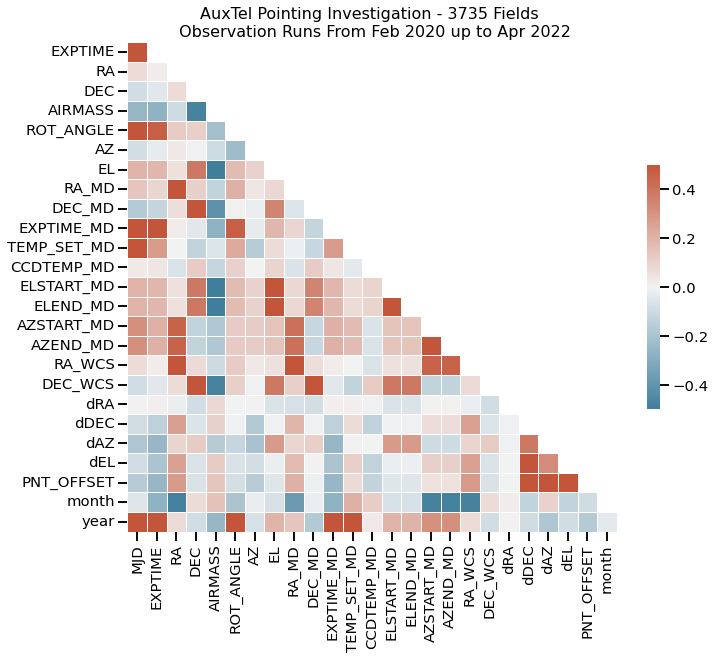

In [37]:
# Compute the correlation matrix
df1b = df.copy()
df1b.dEL = np.abs(df1b.dEL)
df1b.dDEC = np.abs(df1b.dDEC)

df1b.dAZ = np.abs(df1b.dAZ)
df1b.dRA = np.abs(df1b.dRA)

df_corr = df1b.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(f'AuxTel Pointing Investigation - {len(df)} Fields \n Observation Runs From Feb 2020 up to Apr 2022',fontsize=16)
plt.savefig(f'figures/rev_correlation_matrix_{month}.png',facecolor='w',transparent=False,dpi=100)

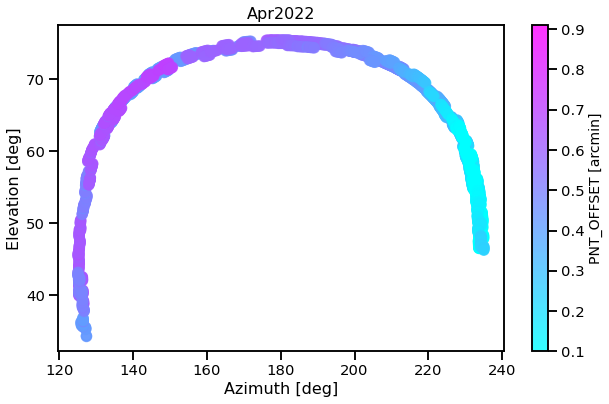

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(df3.AZ, df3.EL, s=100, alpha=0.8, c=df3.PNT_OFFSET, vmin=0.1, vmax=pm+2*s68, label=f'{len(df1)} Fields', cmap='cool')
plt.colorbar().set_label('PNT_OFFSET [arcmin]',fontsize=14)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)
plt.title(f'{month}',fontsize=16)
plt.savefig(f'figures/azel_plane_{month}.png',facecolor='w',transparent=False,dpi=100)

Text(0.5, 1.0, 'Sep 2021 - March 2022')

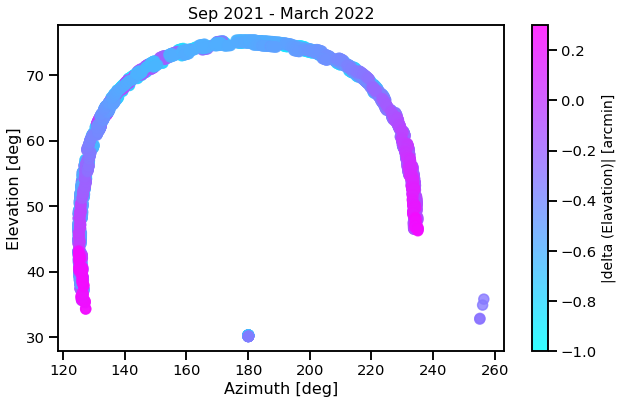

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df1.AZ[sep_up], df1.EL[sep_up], s=100, alpha=0.8, vmin=-1., vmax=0.3, c=df1.dEL[sep_up], label=f'{len(df1)} Fields', cmap='cool')
plt.colorbar().set_label('|delta (Elavation)| [arcmin]',fontsize=14)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)
plt.title('Sep 2021 - March 2022',fontsize=16)